# Overview

Topic modeling is the process of discovering topics in a collection of documents. In this notebook, we will use sentence-Transformers to identify the topics in a collectiion of sentences, paragraphs or shot documents.

In [1]:
!pip install top2vec==1.0.34

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - \ | / - \ | done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl.metadata (3.1 kB)
Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=819466 sha256=a5114cfa515ea0e8477689c51459f26102f76ad48b8d771a5555a8b38aba7def
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


# Loading data

In [2]:
from sklearn.datasets import fetch_20newsgroups

newsgroups=fetch_20newsgroups(subset='all', remove=('headsers', 'footers', 'quotes'))
len(newsgroups.data)

18846

# Loading Pretrained Embedding Models 

We will choice the fastest **embedding_model** `universal-sentence-encoder`.

In [3]:
from top2vec import Top2Vec

model=Top2Vec(documents=newsgroups.data, embedding_model='universal-sentence-encoder', speed='learn', workers=8)
model

2024-02-13 04:10:12.865823: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-13 04:10:12.866015: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-13 04:10:13.046041: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-13 04:10:30,694 - top2vec - INFO - Pre-processing documents for training
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-02-13 04:10:53,239 - top2vec - INFO - Downloading universal-sentence-encoder model
2024-02-

# Get the number of Topics

In [4]:
model.get_num_topics()

106

# Get Topics

Checking if the topics list inlcudes the topic which we want to use, like `unix`. We get all the topics first.

In [5]:
model.get_topics()

(array([['honda', 'motorcycle', 'pillion', ..., 'nissan', 'vehicles',
         'cylinder'],
        ['cmu', 'uiuc', 'tmp', ..., 'claremont', 'rtp', 'igor'],
        ['recchi', 'potvin', 'nhl', ..., 'cubs', 'jets', 'msu'],
        ...,
        ['nuclear', 'radiation', 'cooling', ..., 'fans', 'engine',
         'solaris'],
        ['liefeld', 'comics', 'marvel', ..., 'these', 'libraries', 'gc'],
        ['wiring', 'grounding', 'wires', ..., 'socket', 'electronic',
         'xterm']], dtype='<U15'),
 array([[0.34201702, 0.33560008, 0.3277069 , ..., 0.19923237, 0.19810008,
         0.19781093],
        [0.23449793, 0.21255285, 0.1917478 , ..., 0.12712006, 0.1270203 ,
         0.12670143],
        [0.46242937, 0.42124468, 0.41611543, ..., 0.24204567, 0.24090472,
         0.23889366],
        ...,
        [0.40127984, 0.33482802, 0.317332  , ..., 0.15612869, 0.15481994,
         0.15469754],
        [0.35125515, 0.33463648, 0.33206016, ..., 0.13660967, 0.1346641 ,
         0.13403292],
     

We check if the specifc topic like `unix` was included in the topics list.

In [6]:
model.query_topics('unix', num_topics=1)

([array(['unix', 'public', 'solaris', 'bsd', 'access', 'denver', 'oracle',
         'cmu', 'tor', 'linux', 'library', 'plaintext', 'publicly', 'macs',
         'aix', 'libraries', 'gcc', 'gnu', 'unc', 'kernel', 'freenet',
         'utilities', 'acm', 'cryptography', 'cryptographic', 'ubc', 'cp',
         'private', 'berkeley', 'cu', 'permission', 'athens', 'terminal',
         'nyx', 'node', 'aclu', 'jpl', 'dg', 'univ', 'ieee', 'mit',
         'universities', 'proprietary', 'yale', 'usenet', 'lib', 'gs',
         'eff', 'ut', 'liberties'], dtype='<U15')],
 [array([0.29948997, 0.2909523 , 0.22949609, 0.22572061, 0.22483835,
         0.22344144, 0.2167865 , 0.21243308, 0.20943514, 0.20631856,
         0.20170681, 0.2005843 , 0.20048058, 0.1989446 , 0.19880447,
         0.19807741, 0.19617796, 0.19133797, 0.19037804, 0.1894455 ,
         0.18729717, 0.18125096, 0.1808193 , 0.18063575, 0.18030348,
         0.17916286, 0.17902759, 0.17813194, 0.17804182, 0.17783952,
         0.1767503 , 0.1

# Generate Word Clouds

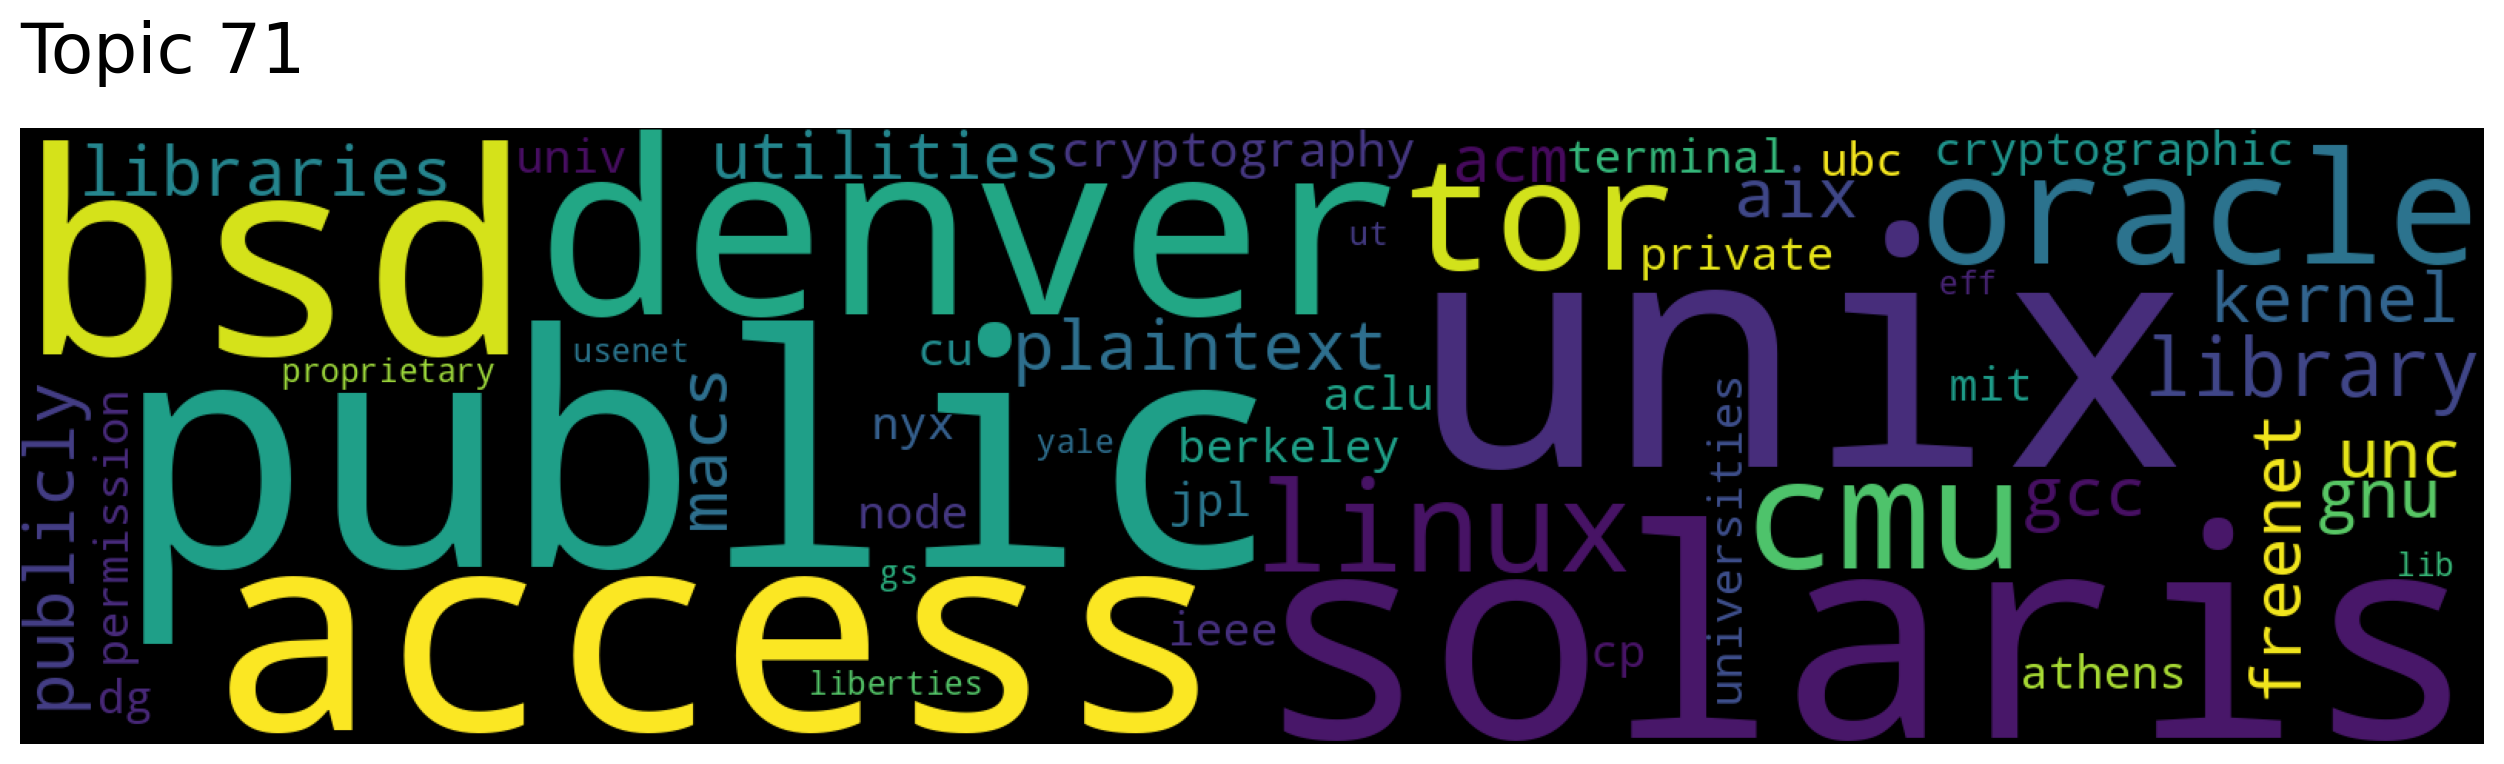

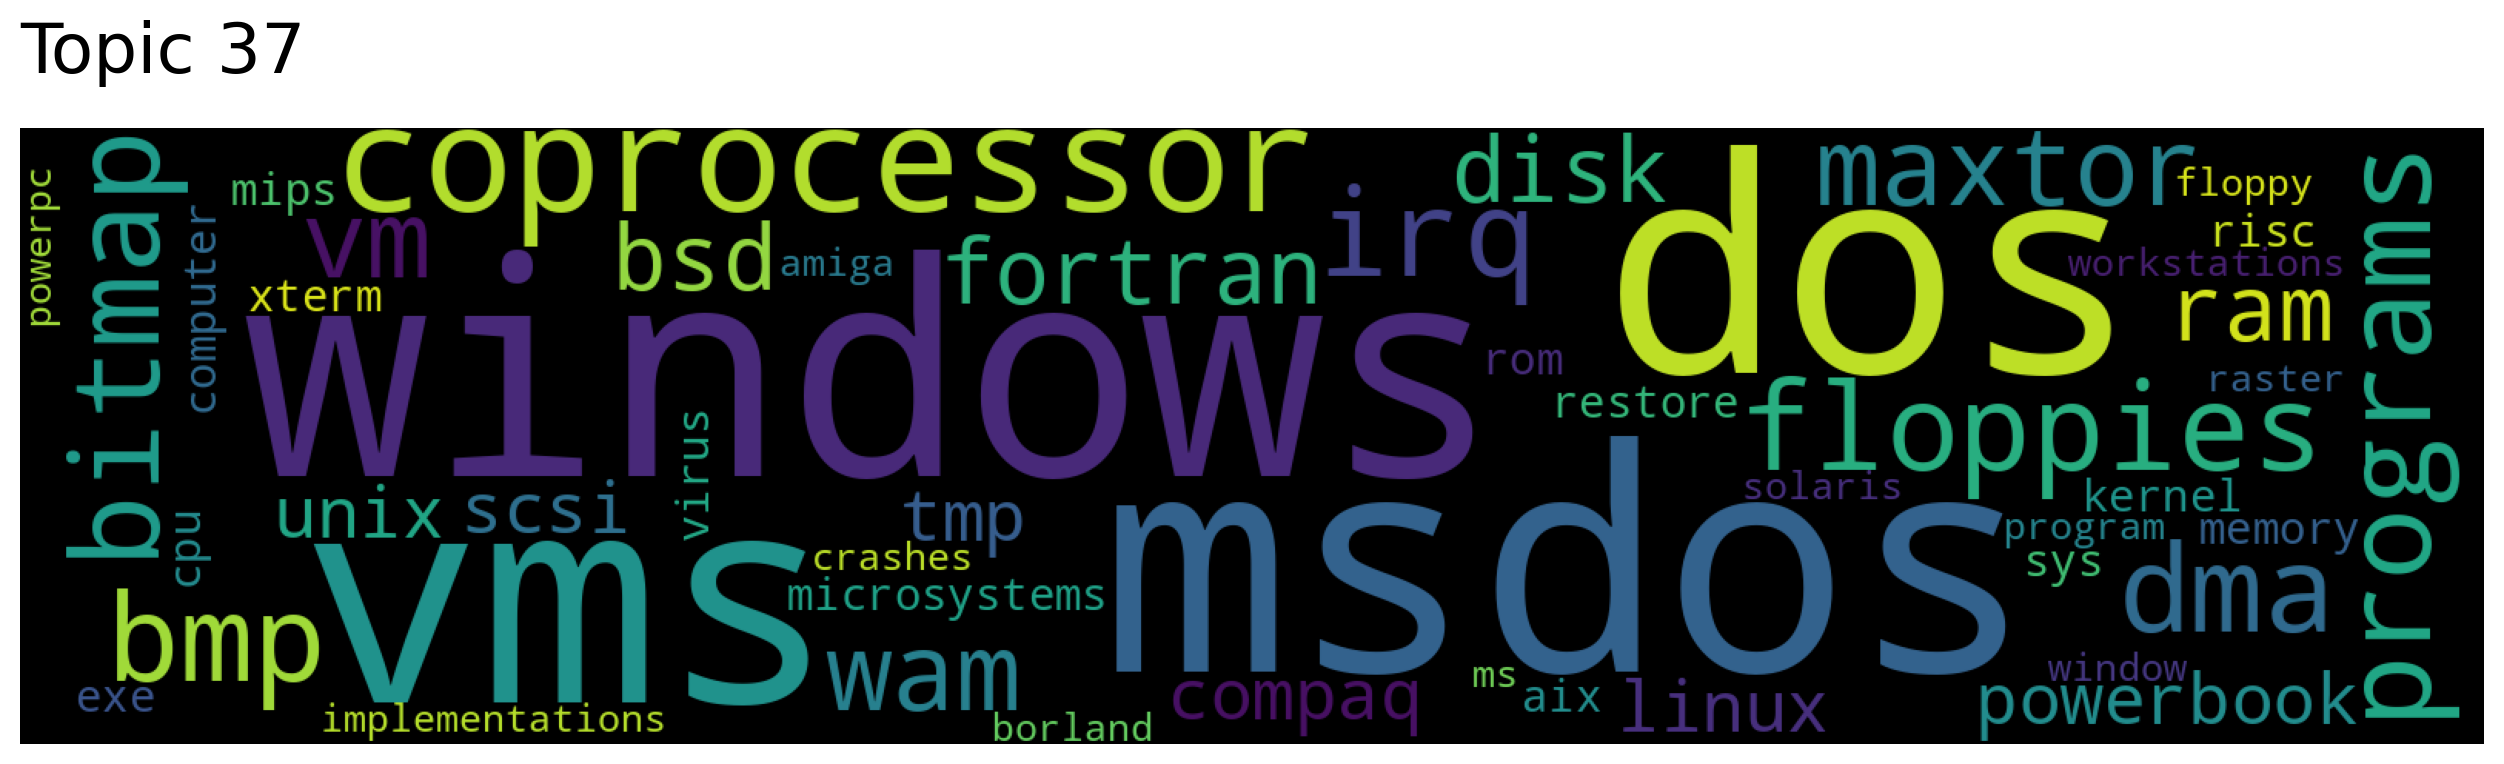

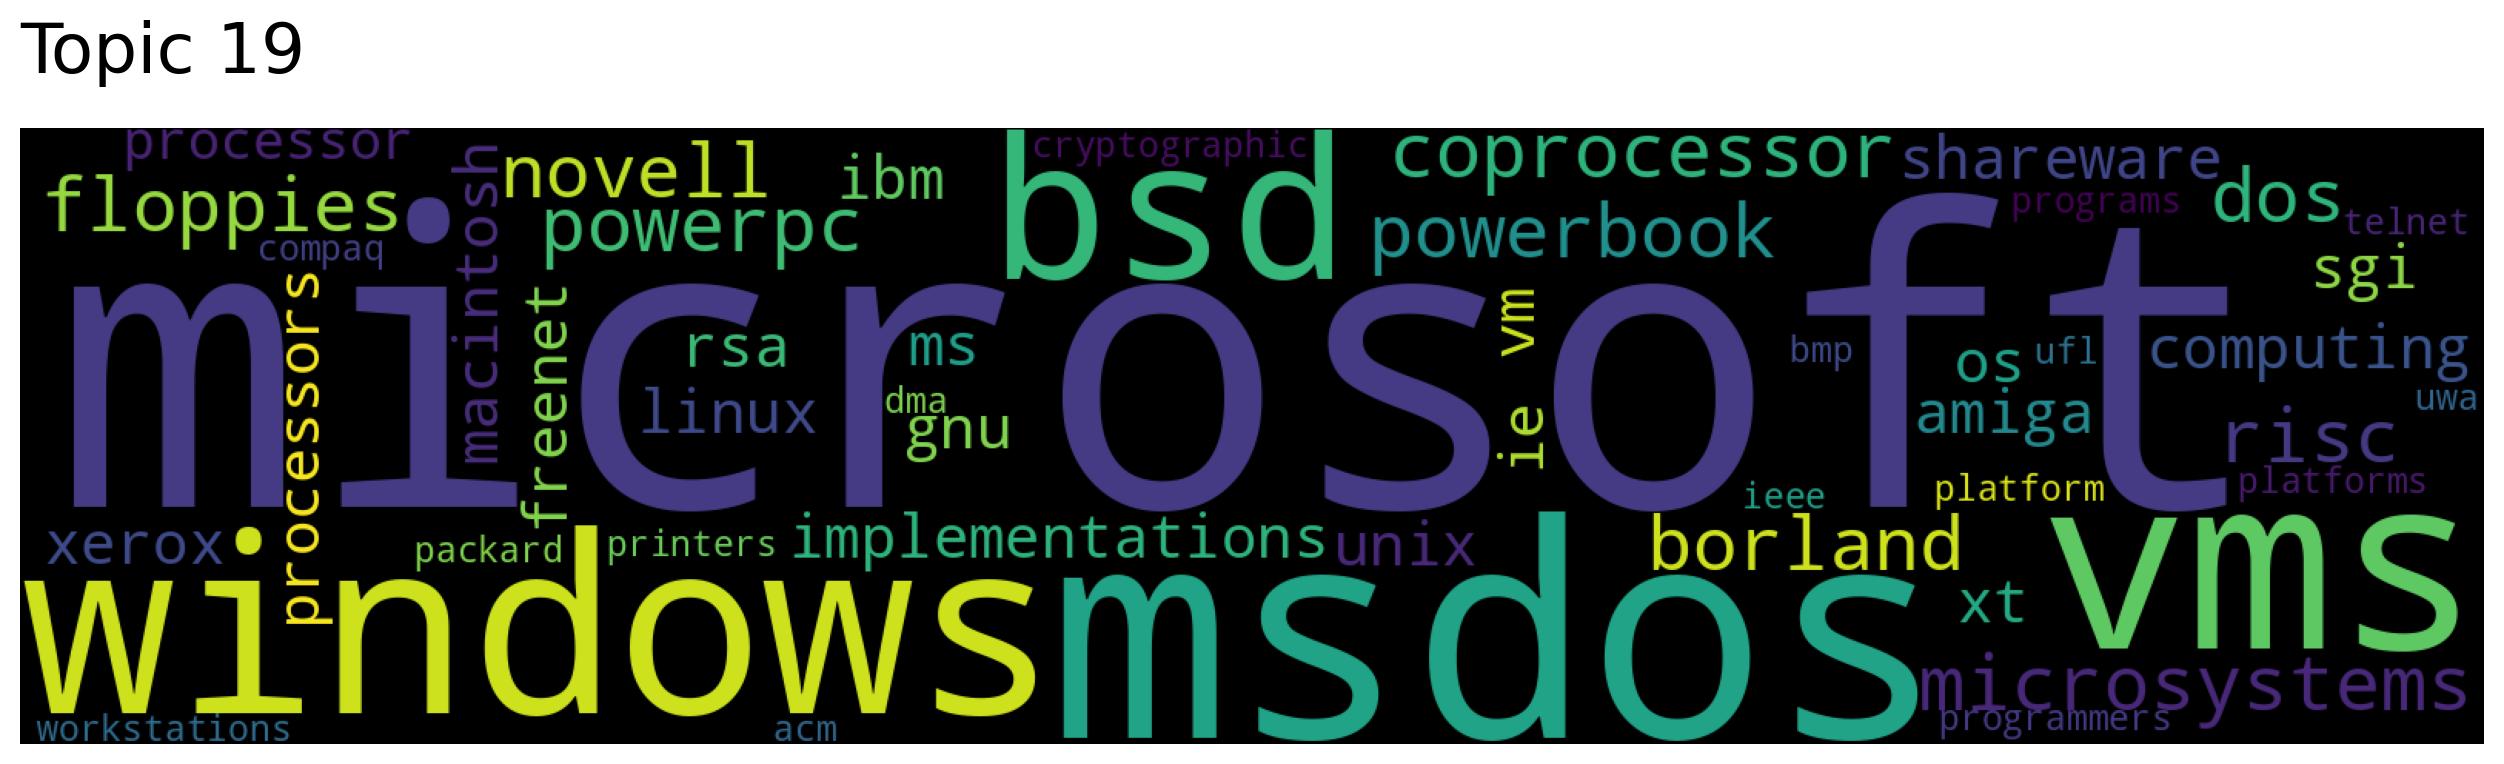

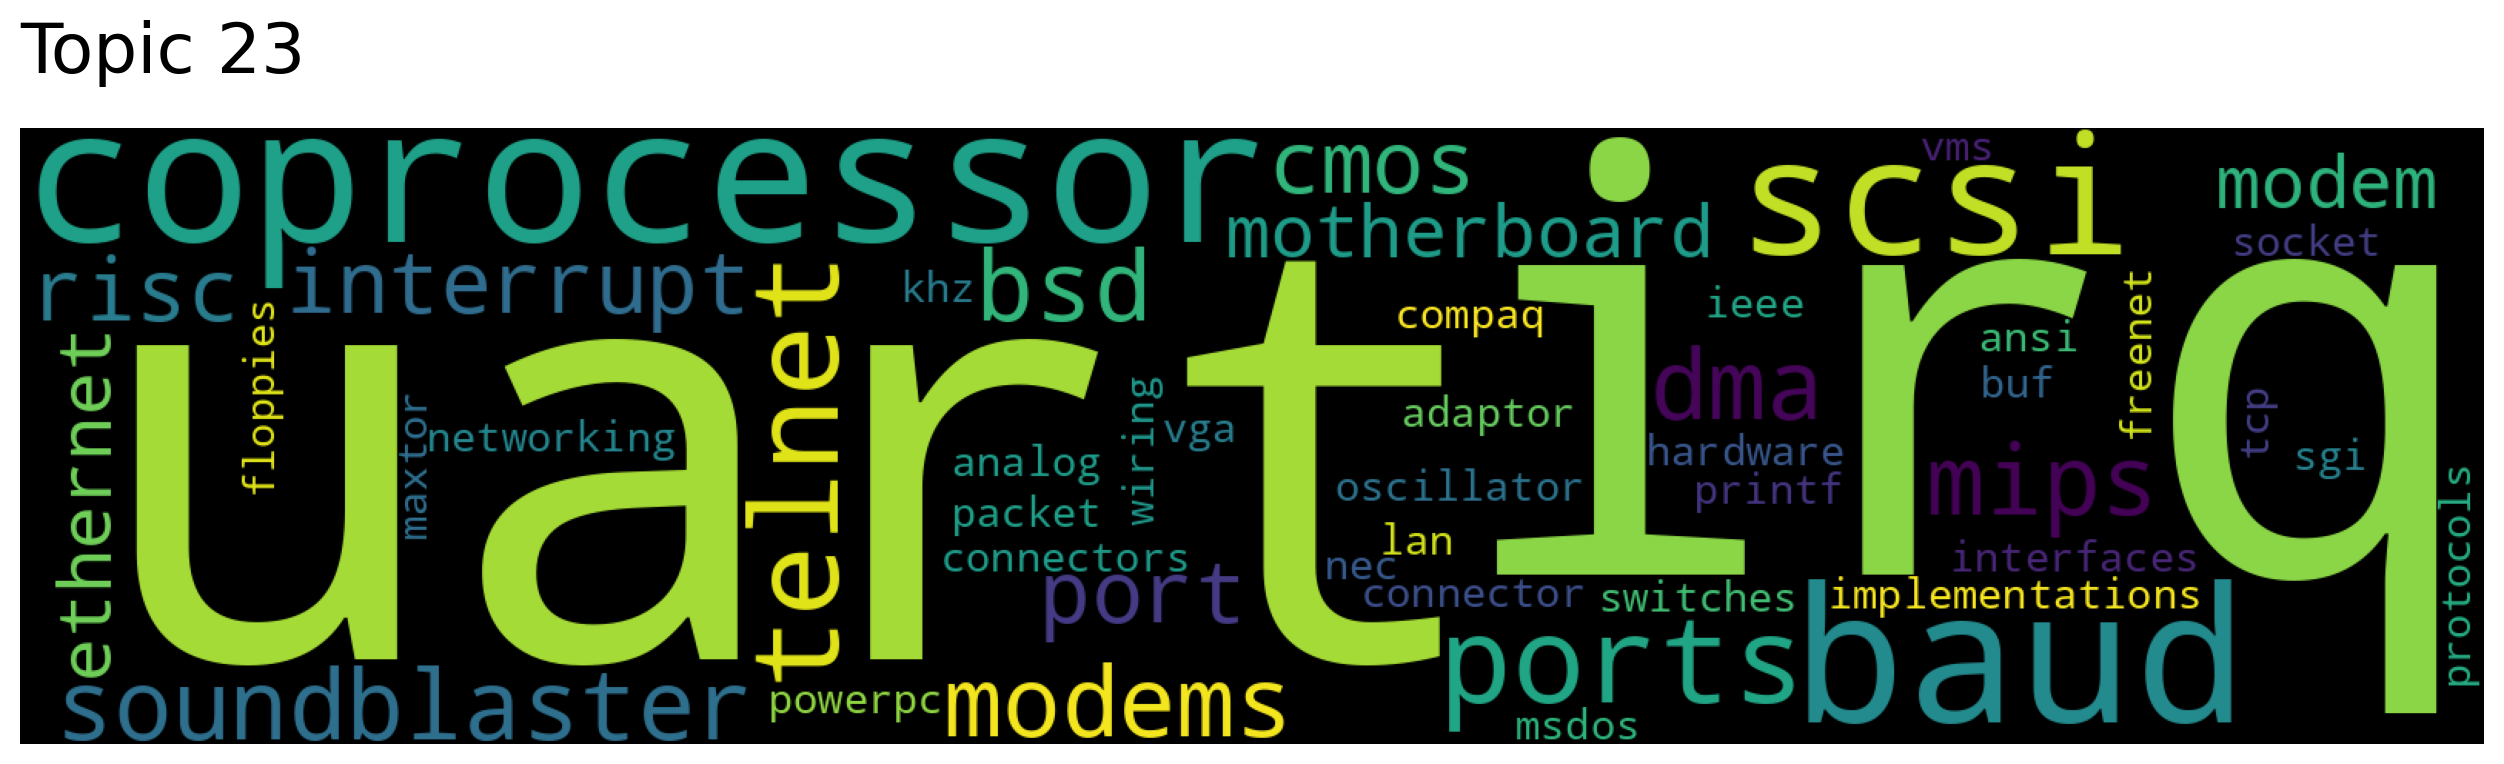

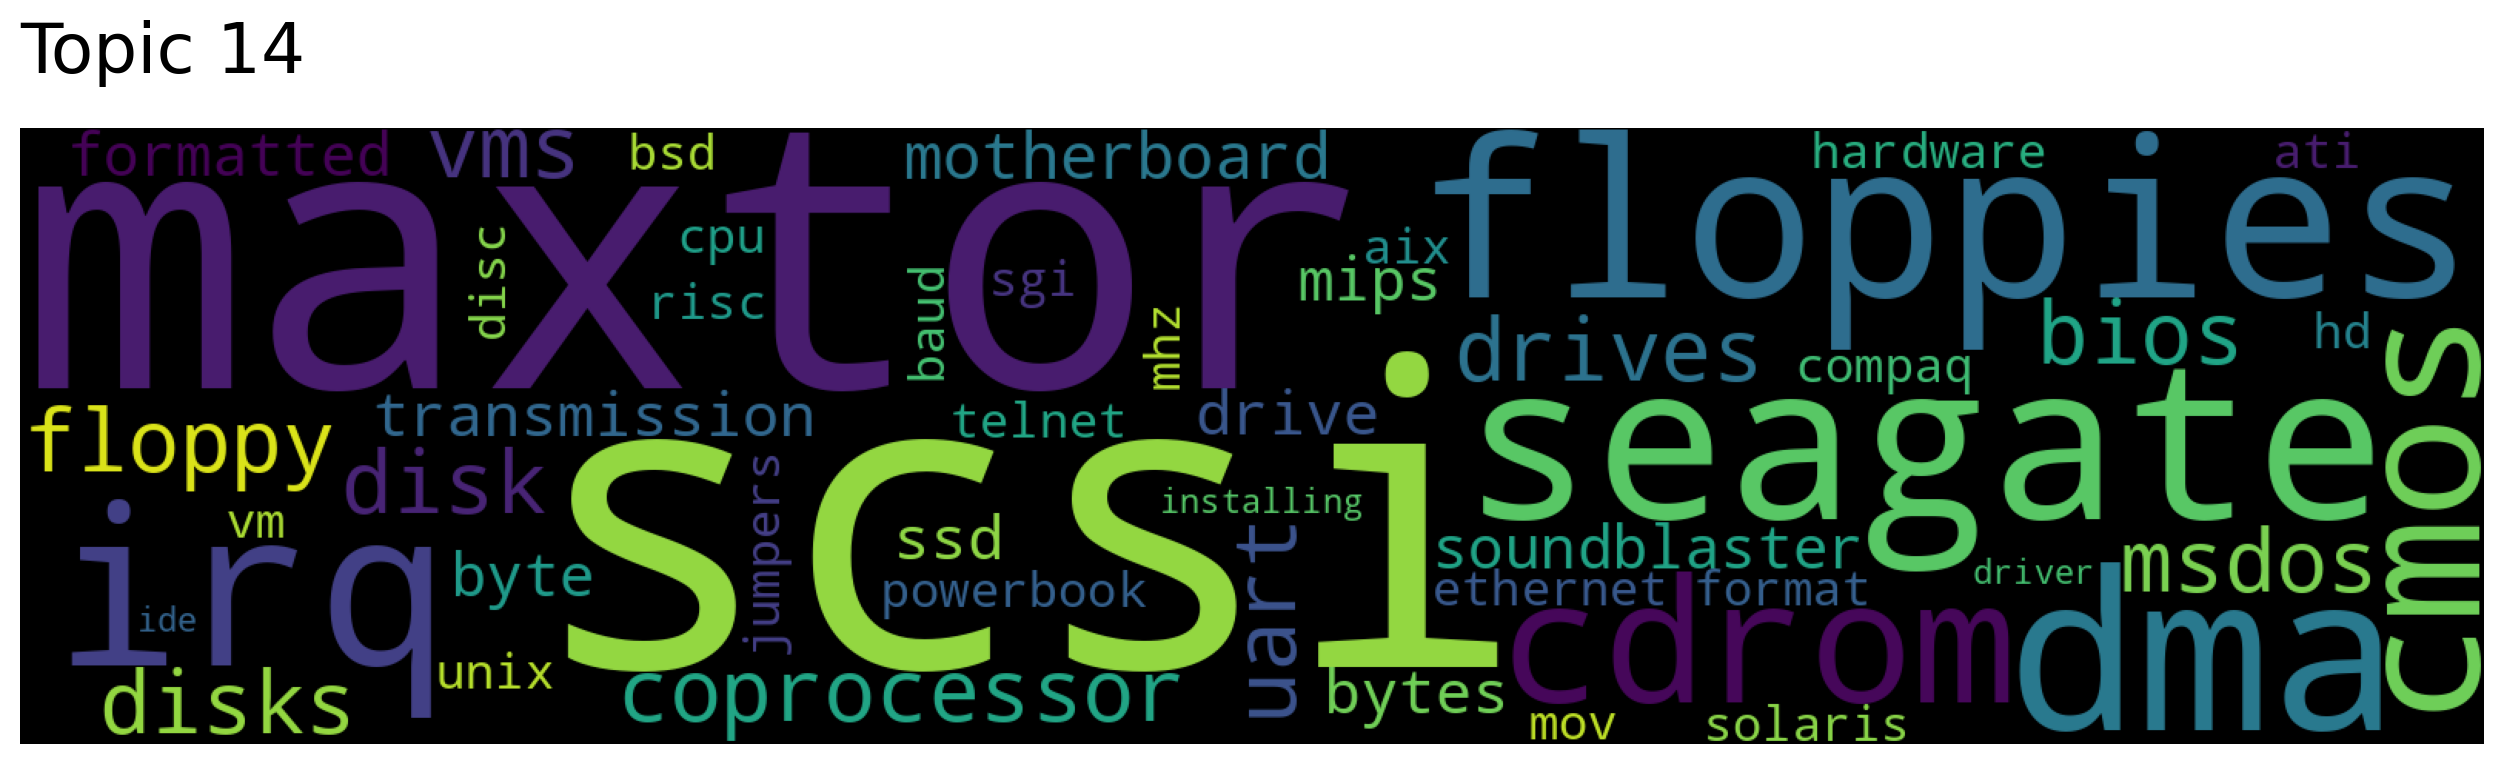

In [7]:
topic_words, word_scores, topic_scores, topic_nums=model.search_topics(keywords=['unix'], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

# Semantic Search Documents by Keywords

Search documents for content similar to `unix`.

In [8]:
documents, document_scores, document_ids=model.search_documents_by_keywords(keywords=['unix'], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f'Document: {doc_id}, Score: {score}')
    print('---------------')
    print(doc)
    print('---------------')
    print()

Document: 6332, Score: 0.4536772657402775
---------------
From: xtifr@netcom.com (Chris Waters)
Subject: Re: PC/Geos, Windows, OS/2, and Unix/X11
Organization: NETCOM On-line Communication Services (408 241-9760 guest)
Lines: 58





                                                       ^
                                                      Novell is at least
                                                      demoing windows apps
                                                      running under UNIXWare.


                                   ^           ^
                                Try MKS.     MKS &
                                           others, esp.
                                              EMX

Note here: the MKS toolkit (for DOS/Windows & OS/2) gives you a good
suite of standard UNIX utilities.  There are other similar systems from
other vendors as well.  The EMX system for OS/2 gives you most of the
standard UNIX system calls for recompiling your UNIX programs u